In [38]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
dataframe= pd.read_csv("/Users/tarun/Desktop/Diwali Sales Data.csv", encoding= 'unicode_escape')
dataframe.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [40]:
dataframe.shape

(11251, 15)

In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [42]:
# dropping irrelevant columns
dataframe.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [43]:
dataframe.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [44]:
#dropping the missing values rows
dataframe.dropna(inplace=True)

In [45]:
dataframe.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [46]:
dataframe.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [47]:
#changing the data type of "Amount" column
dataframe["Amount"]= dataframe["Amount"].astype("int")

In [48]:
#Changing the values of marital_status
def status(x):
    if x==0:
        x="Married"
    elif x==1:
        x="Unmarried"
    return x
dataframe["Marital_Status"]= dataframe["Marital_Status"].apply(status)    

## Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

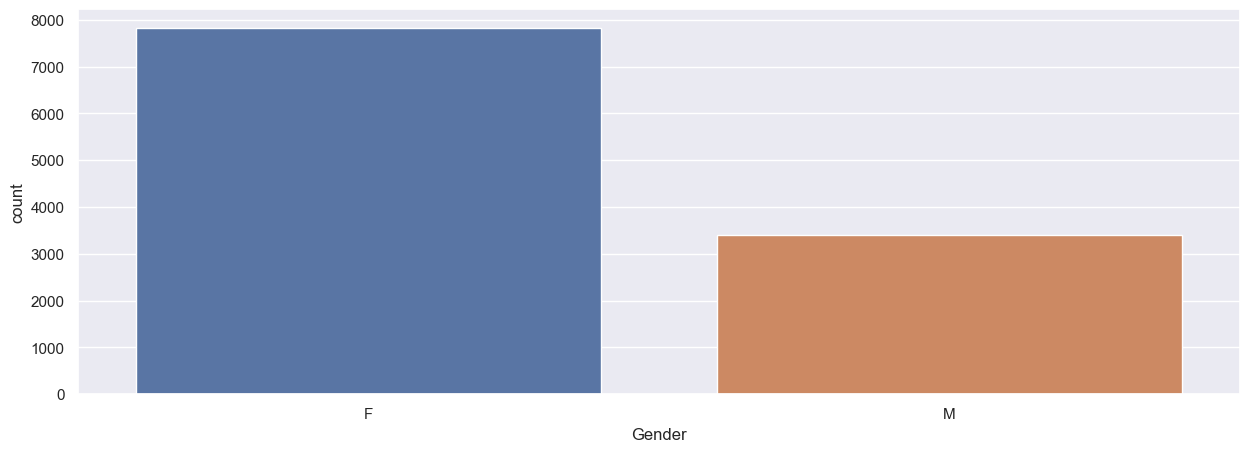

In [49]:
# which gender has the highest number of count
sns.countplot(data=dataframe,x="Gender")

### Conclusion: There of more number of female customers than male

<Axes: xlabel='Gender', ylabel='Amount'>

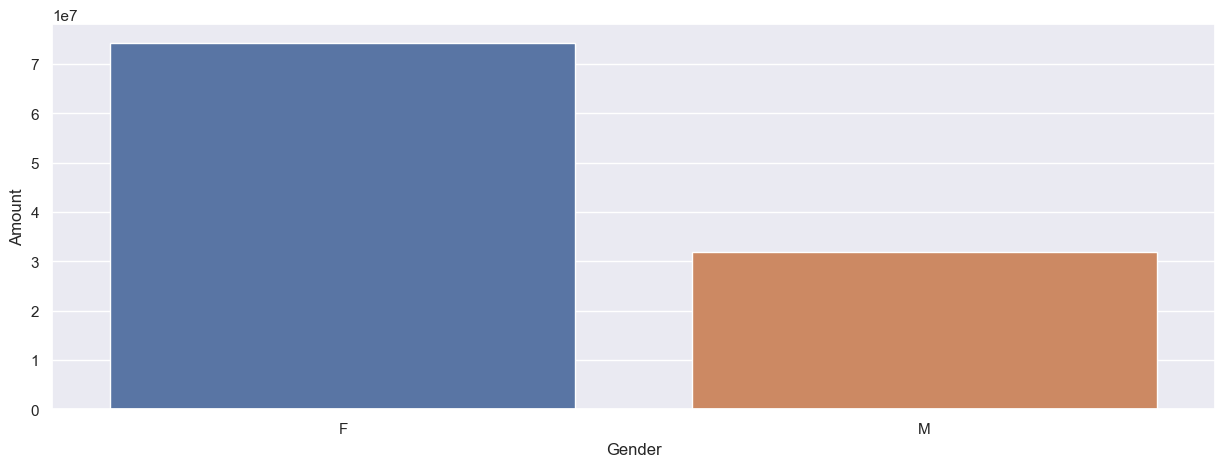

In [50]:
# plotting a bar graph for gender vs total amount
total_amount= dataframe.groupby(["Gender"], as_index=False)["Amount"].sum()
sns.barplot(data=total_amount,x="Gender",y="Amount")

### Conclusion: From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

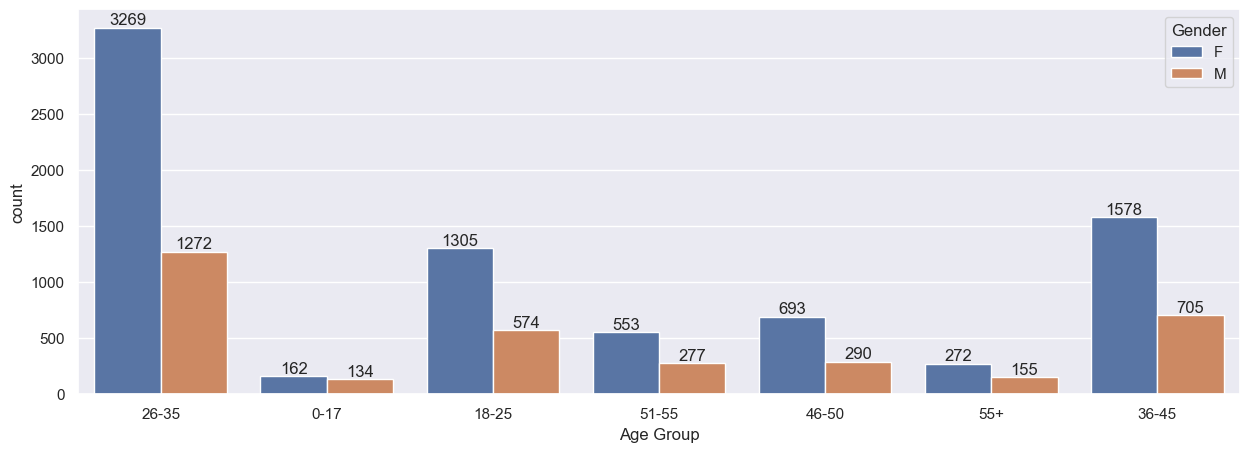

In [51]:
# Exploring the "Age" column
ax=sns.countplot(data=dataframe, x="Age Group",hue="Gender")
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

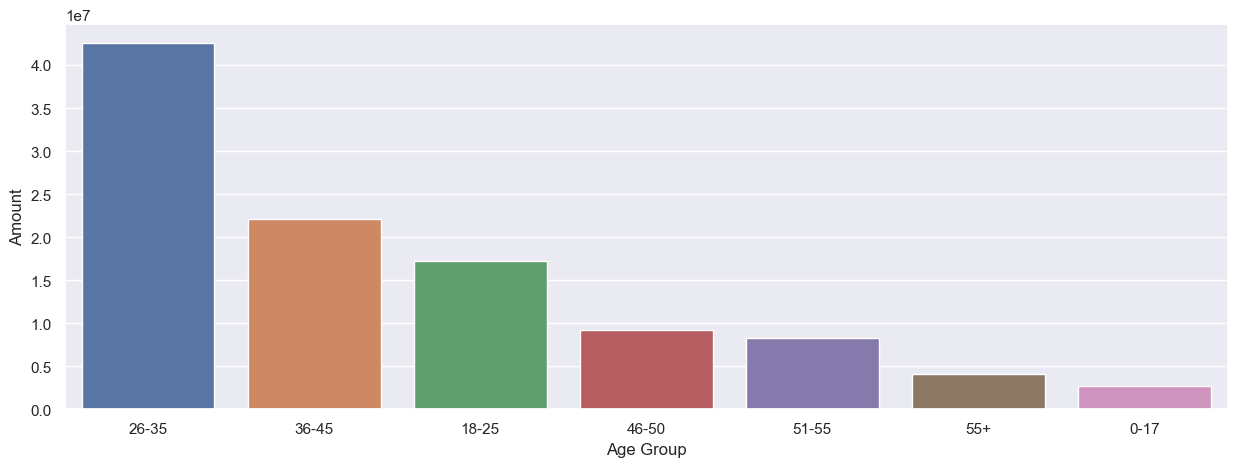

In [52]:
total_amt= dataframe.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(data=total_amt, x="Age Group", y="Amount")

### Conclusion: From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

In [53]:
dataframe.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877


<Axes: xlabel='State', ylabel='Orders'>

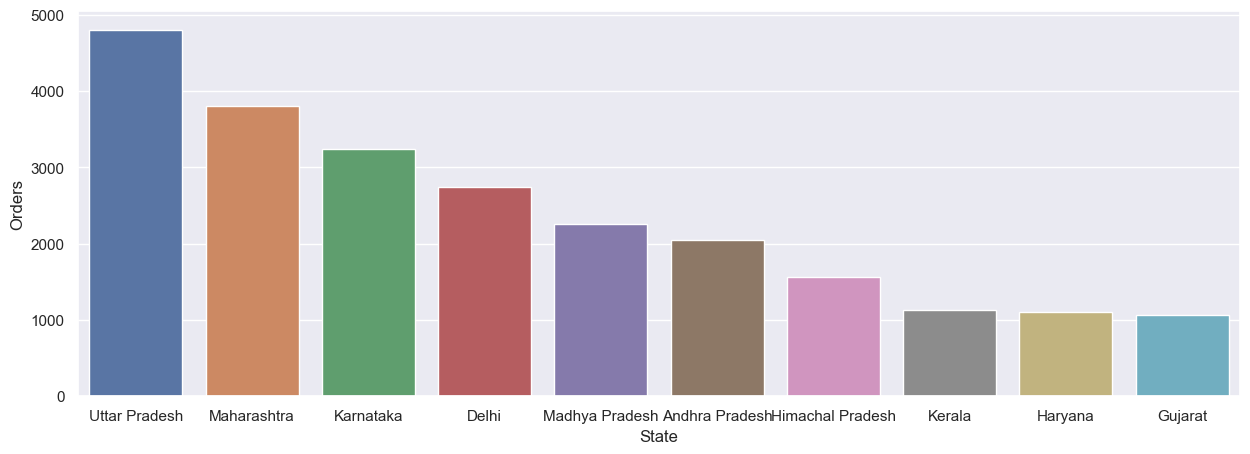

In [54]:
# exploring the state column
total_orders= dataframe.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)
plt.figure(figsize=[15,5])
sns.barplot(data=total_orders,x="State",y="Orders",)


<Axes: xlabel='State', ylabel='Amount'>

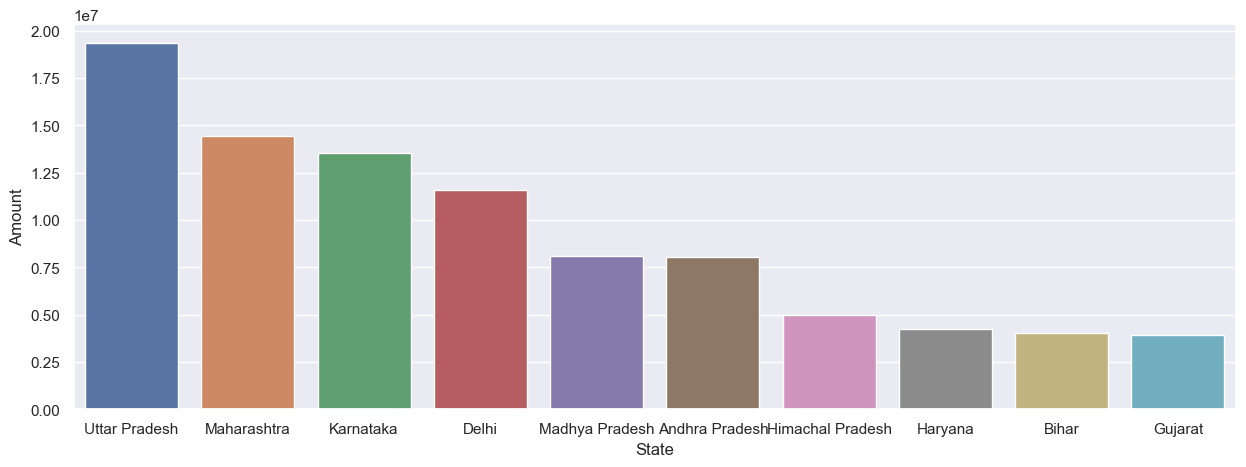

In [55]:
#total amount from top 10 states
total_states_amt= dataframe.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
plt.figure(figsize=[15,5])
sns.barplot(data=total_states_amt, x="State", y="Amount")

### Conclusion: From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

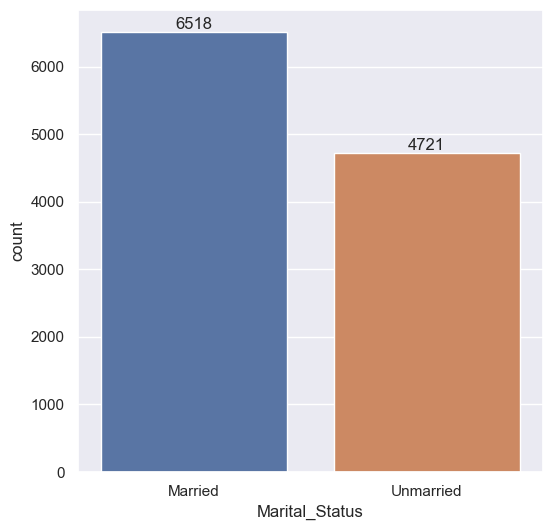

In [56]:
# Exploring Marital Status column
plt.figure(figsize=[6,6])
ax=sns.countplot(data=dataframe, x="Marital_Status")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

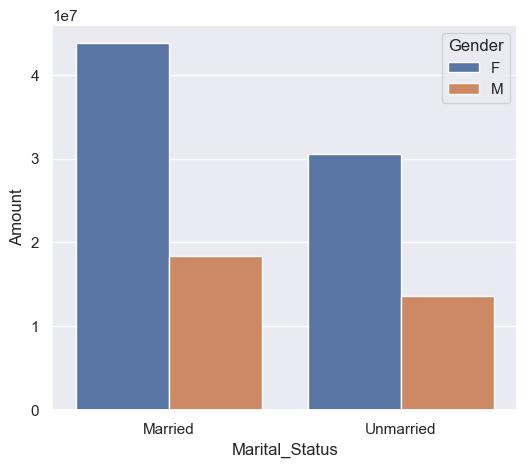

In [59]:
sales_state= dataframe.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
plt.figure(figsize=[6,5])
sns.barplot(data=sales_state,x="Marital_Status", y="Amount", hue="Gender")

### Conclusion: From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

In [60]:
dataframe.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877


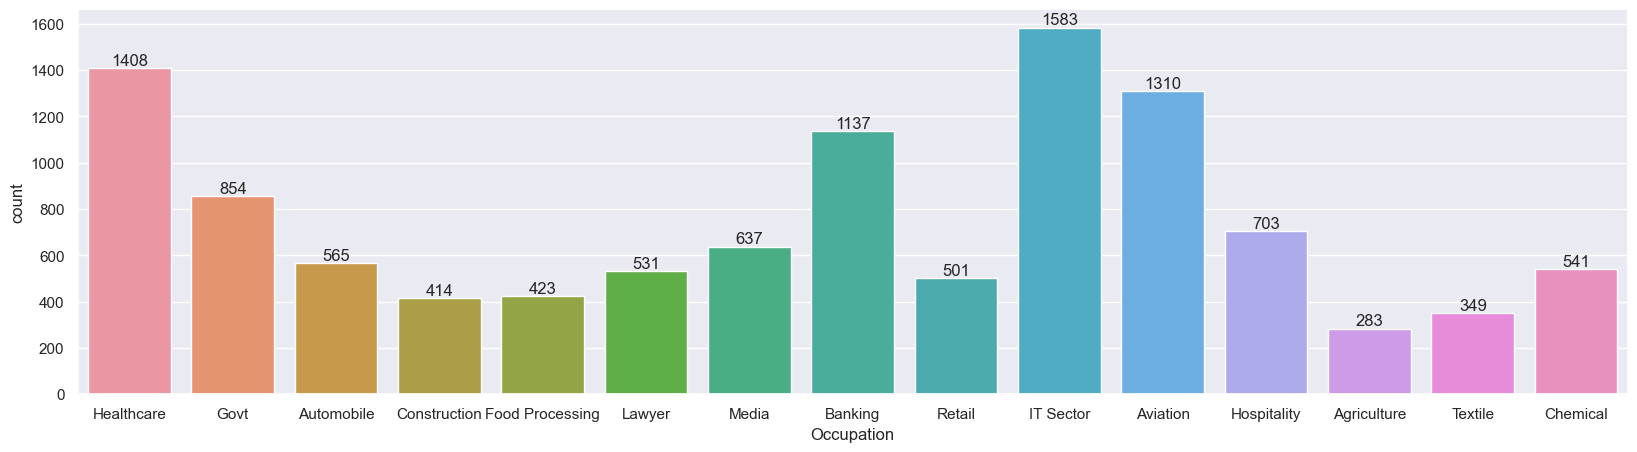

In [61]:
plt.figure(figsize=[20,5])
ax=sns.countplot(data=dataframe, x="Occupation")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

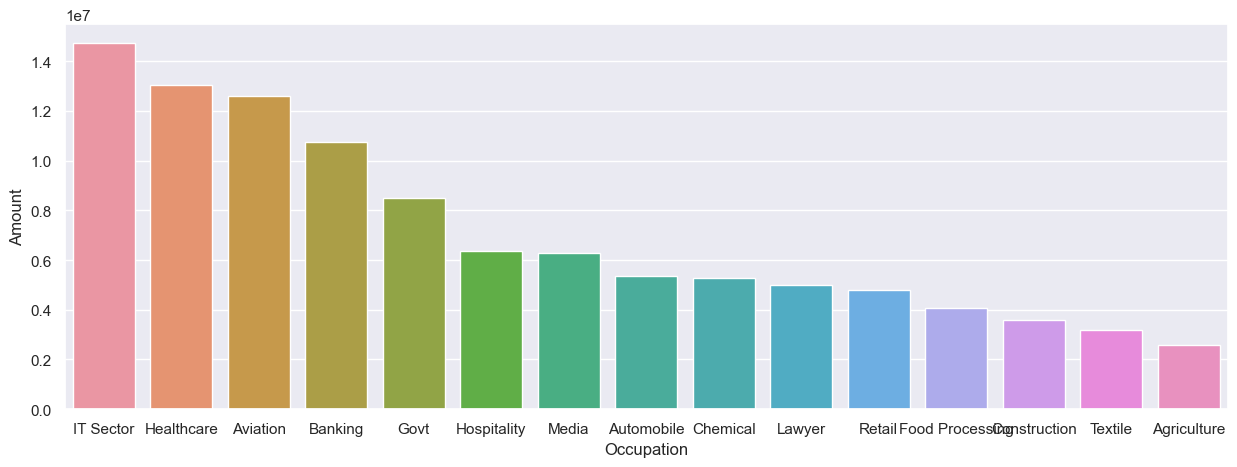

In [63]:
sales_occupation= dataframe.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(data=sales_occupation, x="Occupation", y="Amount")

### Conclusion: From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

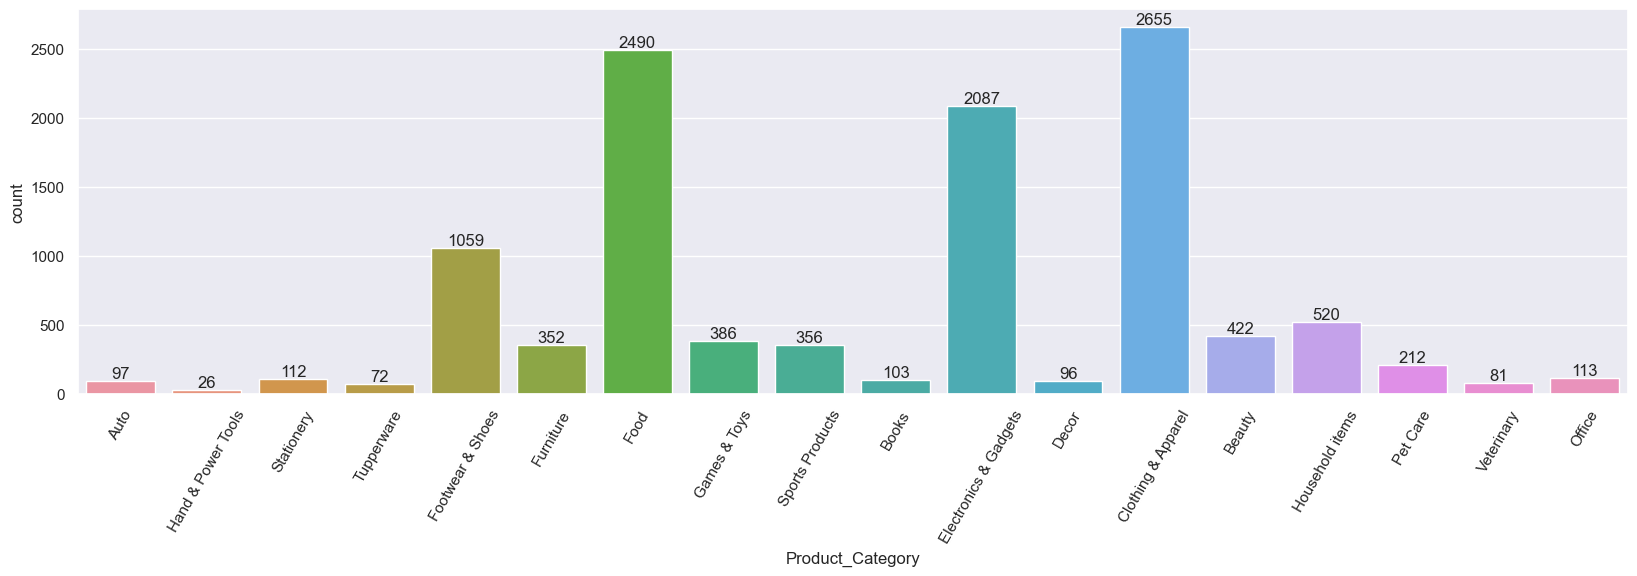

In [66]:
# Exploring the product category column
plt.figure(figsize=[20,5])
ax=sns.countplot(data=dataframe,x="Product_Category")
plt.xticks(rotation=60)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

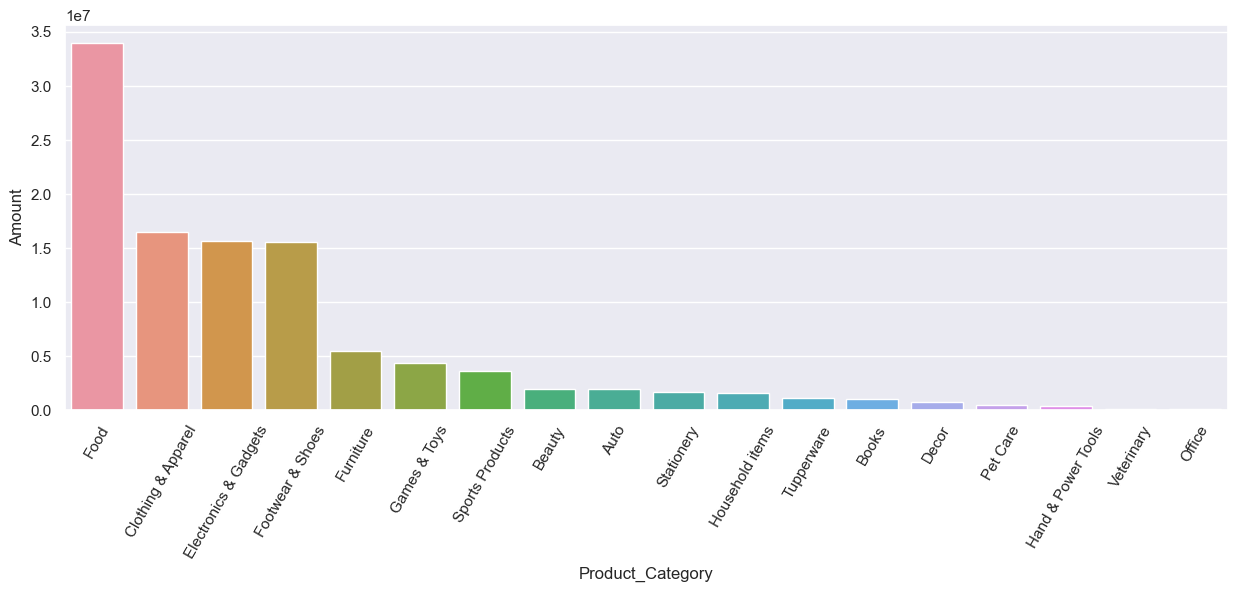

In [69]:
sales_product= dataframe.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
plt.xticks(rotation=60)
sns.barplot(data=sales_product,x='Product_Category',y="Amount")


### Conclusion: From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# Analysis Conclusion
###### Married women of age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category